<a href="https://colab.research.google.com/github/bmxjuane/Juan-Emilio-Persichini-repository-/blob/main/Proyecto_ParteIII_Persichini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>














El dataset elegido reune 3078 de canciones que han sido rankeadas de acuerdo a la cantidad de reproducciones que tuvieron cada dia durante todo el mes de Diciembre de 2018.

Ejemplo: "Thank u, next" de Ariana Grande estuvo en la posicion uno el dia 3, 17, 31 de Diciembre (entre otros) pero la cancion mas reproducida de todo el listado fue "All I Want for Christmas Is You" de Mariah Carey el 24/12/2018.

Cada cancion tiene las siguientes caracteristicas: danceability, energy, speechiness, acousticness, valence, tempo.

Asi como tambien está incluido en el dataset el "track_name" (nombre de cada cancion), "position" (posicion en el ranking diario), "artist" (artista que hizo la cancion) y "streams" (cantidad de reproducciones que tuvo ese dia)

Vamos a plantear una serie de hipotesis:
- En que dias se concentró la mayor cantidad de reproducciones y si es posible identificar algun evento en particular
- Si las variables independientes (ejemplo tempo) se repiten y de que manera en las canciones
- Si es posible sacar una conclusion analizando 2 variables (ej. scatter plot de variable "energy" y "danceability")
- Que dias del mes tuvieron la mayor cantidad de reproducciones
- Si existe una relacion directa entre alguna variable y la cantidad de reproducciones
- Nivel de importancia de cada variable/feature en el exito de una cancion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.read_csv('/content/global spotify 12-2018.csv')

,position,track_name,artist,streams,year,month,day,danceability,energy,speechiness,acousticness,valence,tempo
0,1,All I Want for Christmas Is You,Mariah Carey,10819009,2018,12,24,0.335,0.625,0.0386,0.1640,0.346,150.277
1,2,Last Christmas,Wham!,9098668,2018,12,24,0.735,0.478,0.0293,0.1890,0.947,107.682
2,1,"thank u, next",Ariana Grande,7450416,2018,12,3,0.724,0.647,0.0658,0.2800,0.435,106.960
3,3,Santa Tell Me,Ariana Grande,7086794,2018,12,24,0.506,0.628,0.1730,0.0545,0.556,191.708
4,4,It's Beginning to Look a Lot Like Christmas,Michael Bublé,6877219,2018,12,24,0.350,0.232,0.0331,0.9070,0.381,93.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,96,breathin,Ariana Grande,838536,2018,12,30,0.568,0.656,0.0433,0.0211,0.364,100.049
3074,97,Armed And Dangerous,Juice WRLD,832034,2018,12,30,0.736,0.670,0.3110,0.1860,0.845,130.032
3075,98,FRIENDS,Marshmello,829067,2018,12,30,0.626,0.880,0.0504,0.2050,0.534,95.079
3076,99,Rise,Jonas Blue,826239,2018,12,30,0.687,0.785,0.0333,0.3270,0.655,106.046


In [4]:
df = pd.read_csv('/content/global spotify 12-2018.csv')

In [ ]:
df.shape

(3078, 13)

In [ ]:
df.head(5)

,position,track_name,artist,streams,year,month,day,danceability,energy,speechiness,acousticness,valence,tempo
0,1,All I Want for Christmas Is You,Mariah Carey,10819009,2018,12,24,0.335,0.625,0.0386,0.1640,0.346,150.277
1,2,Last Christmas,Wham!,9098668,2018,12,24,0.735,0.478,0.0293,0.1890,0.947,107.682
2,1,"thank u, next",Ariana Grande,7450416,2018,12,3,0.724,0.647,0.0658,0.2800,0.435,106.960
3,3,Santa Tell Me,Ariana Grande,7086794,2018,12,24,0.506,0.628,0.1730,0.0545,0.556,191.708
4,4,It's Beginning to Look a Lot Like Christmas,Michael Bublé,6877219,2018,12,24,0.350,0.232,0.0331,0.9070,0.381,93.269


Ya empezando a sacar conclusiones podemos determinar que de acuerdo al siguiente grafico la mayor cantidad de reproducciones se dió en los dias 24 y 25 teniendo como principal motivo el festejo de Navidad.

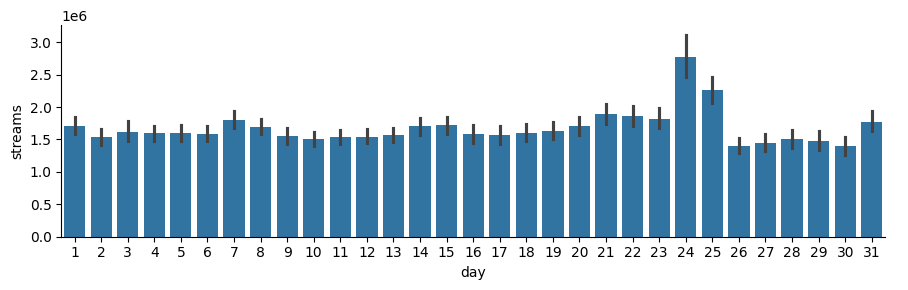

In [5]:
sns.catplot(x="day", y="streams", data=df, kind = "bar", height = 3, aspect = 3)

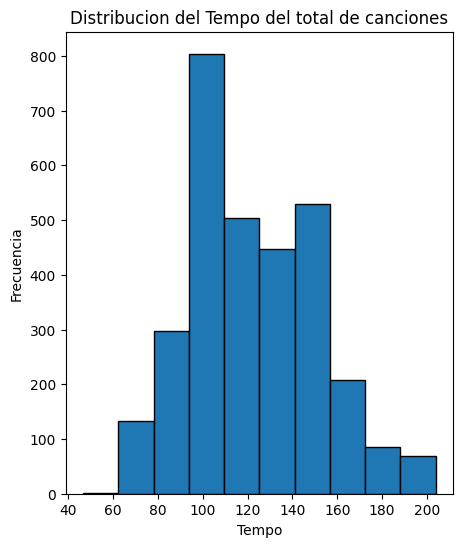

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.hist(df['tempo'], bins=10, edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frecuencia')
_ = plt.title('Distribucion del Tempo del total de canciones')

De acuerdo al grafico precedente podemos decir que la mayoria de las canciones tienen un tempo alrededor a 100

Asi tambien podemos indicar con el siguiente grafico que aquellas canciones que son mas "energicas" son mas "bailables.

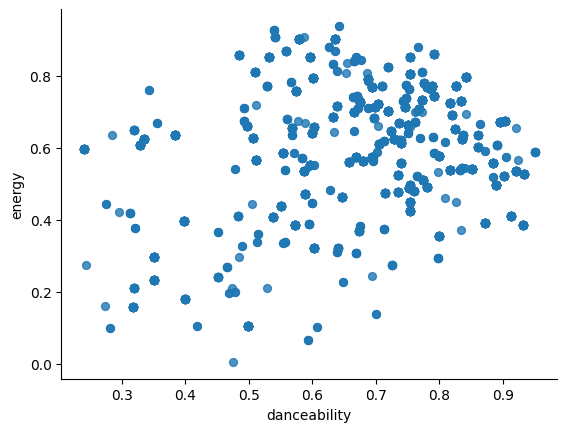

In [7]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='danceability', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Luego metiendonos con el top 50 de canciones mas escuchadas, vamos a sacar algunas conclusiones acerca de este grupo.

In [8]:
dftop50 = df[df['streams'] >= 4080000]

In [9]:
dftop50

,position,track_name,artist,streams,year,month,day,danceability,energy,speechiness,acousticness,valence,tempo
0,1,All I Want for Christmas Is You,Mariah Carey,10819009,2018,12,24,0.335,0.625,0.0386,0.1640,0.346,150.277
1,2,Last Christmas,Wham!,9098668,2018,12,24,0.735,0.478,0.0293,0.1890,0.947,107.682
2,1,"thank u, next",Ariana Grande,7450416,2018,12,3,0.724,0.647,0.0658,0.2800,0.435,106.960
3,3,Santa Tell Me,Ariana Grande,7086794,2018,12,24,0.506,0.628,0.1730,0.0545,0.556,191.708
4,4,It's Beginning to Look a Lot Like Christmas,Michael Bublé,6877219,2018,12,24,0.350,0.232,0.0331,0.9070,0.381,93.269
5,5,Jingle Bell Rock,Bobby Helms,6040533,2018,12,24,0.754,0.424,0.0363,0.6430,0.806,119.705
6,6,It's the Most Wonderful Time of the Year,Andy Williams,5960727,2018,12,24,0.240,0.598,0.0370,0.7660,0.776,202.082
7,3,Rockin' Around The Christmas Tree,Brenda Lee,5786608,2018,12,25,0.589,0.472,0.0502,0.6140,0.898,67.196
8,8,Happy Xmas (War Is Over) - Remastered,John Lennon,5692945,2018,12,24,0.328,0.607,0.0315,0.3190,0.395,146.539
9,9,Do They Know It's Christmas? - 1984 Version,Band Aid,5497071,2018,12,24,0.599,0.642,0.0363,0.1640,0.349,115.412


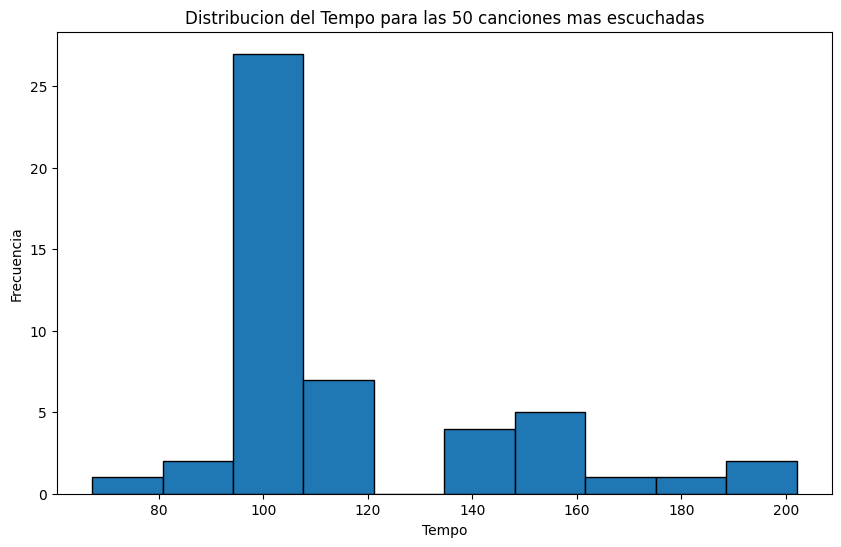

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(dftop50['tempo'], bins=10, edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frecuencia')
_ = plt.title('Distribucion del Tempo para las 50 canciones mas escuchadas')


In [11]:
print(dftop50['tempo'].mode())

0    106.96
Name: tempo, dtype: float64


Podemos ver que en las canciones mas escuchadas el tempo que mas se repite tambien es alrededor de 100

Vamos a agrupar las variables independientes y dar una pequeña descripcion de cada una:
- Danceability: que tan bailable es la cancion
- Energy: intensidad o actividad de la cancion
- Speechiness: que tantas voces hay en la cancion
- Acousticness: que tan acustica es la cancion, lo contrario seria digital
- Valence: que tan alegre resulta la cancion
- Tempo: velocidad de la cancion

In [12]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo']

Con el siguiente grafico podemos determinar que el exito de una cancion no va a estar determinado por la variable "danceability" y la gente va a seguir eligiendo la cancion por mas que no sea bailable.

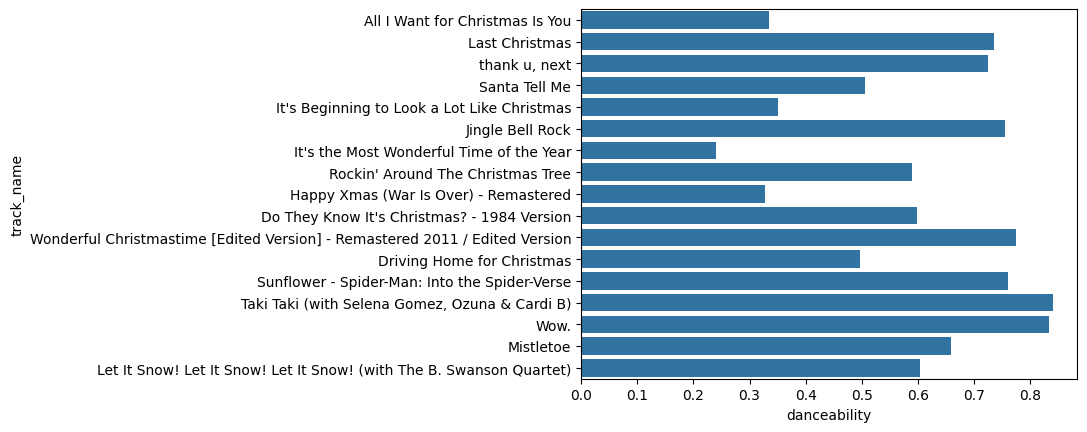

In [13]:
sns.barplot(data=dftop50, y='track_name', x='danceability')
plt.show()

Vamos a utilizar el coeficiente de Pearson para saber si existe alguna relacion entre la variable dependiente (Streams) y las variables independientes o features

In [14]:
corr_coeff =df['tempo'].corr(df['streams'], method='pearson')
print(corr_coeff)

-0.03992184408766812


In [105]:
corr_coeff =df['danceability'].corr(df['streams'], method='pearson')
print(corr_coeff)

-0.03446361028157701


In [106]:
corr_coeff =df['energy'].corr(df['streams'], method='pearson')
print(corr_coeff)

-0.04945047718127466


In [107]:
corr_coeff =df['speechiness'].corr(df['streams'], method='pearson')
print(corr_coeff)

-0.05296582633895497


In [108]:
corr_coeff =df['acousticness'].corr(df['streams'], method='pearson')
print(corr_coeff)

0.01405765667838332


In [109]:
corr_coeff =df['valence'].corr(df['streams'], method='pearson')
print(corr_coeff)

0.08307442861247354


Luego de evaluar cada una de las features con el coeficiente de Pearson podemos afirmar que no existe ninguna relacion entre las variables independientes analizadas y la cantidad de streams

En el siguiente grafico se ve claramente que no existe ninguna relacion

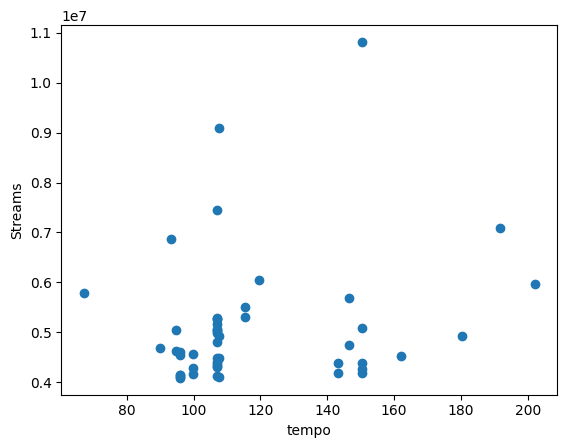

In [15]:
plt.plot(dftop50['tempo'], dftop50['streams'], 'o')
plt.xlabel('tempo')
plt.ylabel('Streams')
plt.show()

Tambien podemos plantear una regresion lineal y graficarla para ver que no existe una relacion entre la cantidad de reproducciones (variable objetivo/dependiente "Streams") y la/s variables independientes. En este caso "valence"

Slope: [102902.10737173]
Intercept: 5155160.28409659


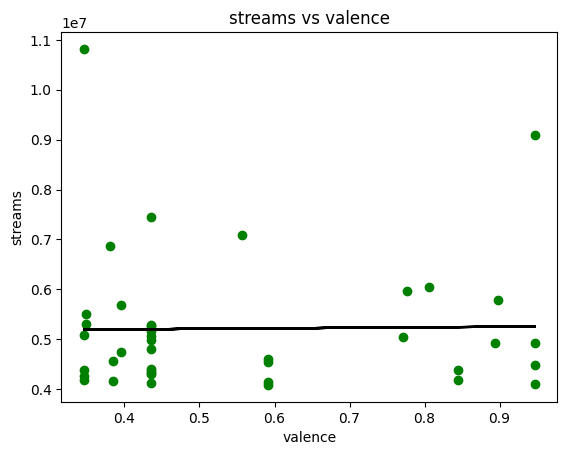

In [16]:
#feature/variable independiente
X = dftop50[['valence']]
#target/variable dependiente
y = dftop50['streams']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor= LinearRegression()
regressor.fit(X_train, y_train)
slope = regressor.coef_
intercept = regressor.intercept_
print("Slope:", slope)
print("Intercept:", intercept)
viz_train = plt
viz_train.scatter(X_train, y_train, color = 'g')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('streams vs valence')
viz_train.xlabel('valence')
viz_train.ylabel('streams')
viz_train.show()


***Contexto de negocio***

 Poder ofrecer un analisis a aquellos artistas o productores musicales interesados en conocer cuales son las variables que deben "manipular" para tener mas probabilidades de que una cancion sea "exitosa". Definiendo como exitosa a aquellas canciones que reciben una enorme cantidad de reproducciones y logran alcanzar el top 50 de canciones mas escuchadas en Spotify

Vamos a utilizar el modelo Random Forest para determinar sobre que variables deberian enfocarse mas los productores musicales o artistas para tratar de grabar una cancion con altas chances de llegar a las primeras posiciones en el ranking

In [17]:
from sklearn.ensemble import RandomForestClassifier

features = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo']
target = 'position'

X = dftop50[features]
y = dftop50[target]

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

for i, feature in enumerate(features):
    print(f"{feature}: {importances[i]}")



danceability: 0.17044497933512467
energy: 0.1370968055357662
speechiness: 0.1688705950767374
acousticness: 0.1692728314853667
valence: 0.18716063628924748
tempo: 0.16715415227775765


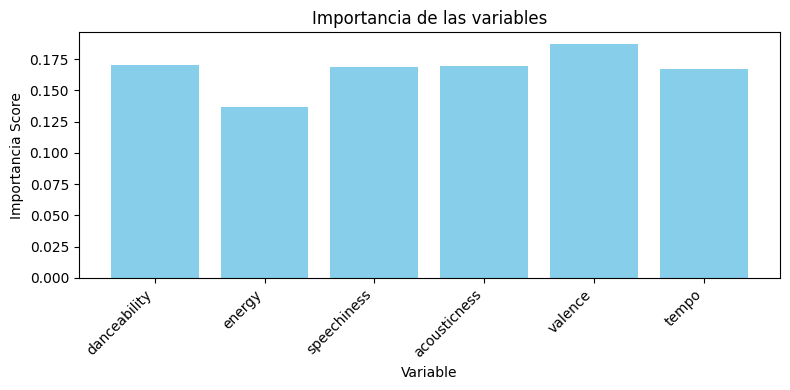

In [33]:
importances = {
    "danceability": 0.17044497933512467,
    "energy": 0.1370968055357662,
    "speechiness": 0.1688705950767374,
    "acousticness": 0.1692728314853667,
    "valence": 0.18716063628924748,
    "tempo": 0.16715415227775765}
variable_names = list(importances.keys())
importance_values = list(importances.values())

plt.figure(figsize=(8, 4))
plt.bar(variable_names, importance_values, color='skyblue')
plt.xlabel("Variable")
plt.ylabel("Importancia Score")
plt.title("Importancia de las variables")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [34]:
importances = {
    "2-danceability": 0.17044497933512467,
    "6-energy": 0.1370968055357662,
    "4-speechiness": 0.1688705950767374,
    "3-acousticness": 0.1692728314853667,
    "1-valence": 0.18716063628924748,
    "5-tempo": 0.16715415227775765}

sorted_variables = sorted(importances.items(), key=lambda x: x[1], reverse=True)
for variable, importance in sorted_variables:
    print(f"{variable}: {importance}")


1-valence: 0.18716063628924748
2-danceability: 0.17044497933512467
3-acousticness: 0.1692728314853667
4-speechiness: 0.1688705950767374
5-tempo: 0.16715415227775765
6-energy: 0.1370968055357662


Podemos determinar que esa es la escala de importancia de las variables, las cuales seran "manipuladas" en ese orden al momento de producir una cancion y asi aumentar las probabilidades de que la cancion esté en el top 50 de canciones mas reproducidas.